Ego network is also known as personlized network in project. Embeddedness is like mutual friends in a network.
In an ego network of a all nodes are already friends of a. Therefore now degree of e in this ego network is mutual friends of e and a.
Dispersion (most mutual friends are in dispersed cluters)
disp(u,v) = summation over all s,t in set of u,v d(s,t)
if d = 0 if mutual friends know each other
d = 1 if mutual friends do not know each other
(count the pair of mutual friends who do not know each other)
Issue is if there are many mutual friends, even if they are in the same cluster that is not dispersed they may not know each other. 
We need to normalize by the number of mutual friends they have.
new parameter is r = number of hops we can say two mutual friends know each other if they are connected by r number of hops at most. If more hops then they do not know each other.



In [2]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [3]:
g = read_graph(file = 'facebook_combined.txt',format = c("edgelist"),directed=FALSE)
g$names = V(g)

In [4]:
core_nodes= c(1,108,349,484,1087)

In [5]:
find_dispersion = function(graph_,neigh,mutual_f){
    graph_$names = V(graph_)
    disp_graph = delete.vertices(graph_, c(neigh))
    disp_graph$names = sort(which(graph_$names!=neigh))
    #print(disp_graph$names)
   # print(which(disp_graph$names %in% mutual_f))
    #print(mutual_f)
    mutual_f = V(disp_graph)[which(disp_graph$names %in% mutual_f)]
    dispersion = 0
    if (length(mutual_f) <= 1) {
        dispersion = 0
    }
    else {
        #cat("h")
        #print(vcount(disp_graph))
        dia = diameter(disp_graph, directed = FALSE)
        dis = shortest.paths(disp_graph)
        dis[which(is.infinite(dis))]<-dia+1
        #print(dis)
        friends_pair = combn(mutual_f, 2, FUN = NULL, simplify = TRUE)
        for (i in 1:(length(friends_pair)/2)) {
         pair_1 = friends_pair[,i][1]
          pair_2 = friends_pair[,i][2]
            #cat(pair_1,pair_2)
        #print(dis[,pair_1][pair_2])
          dispersion =dispersion+ dis[,pair_1][pair_2]
           
        
        }
    }

    dispersion
}

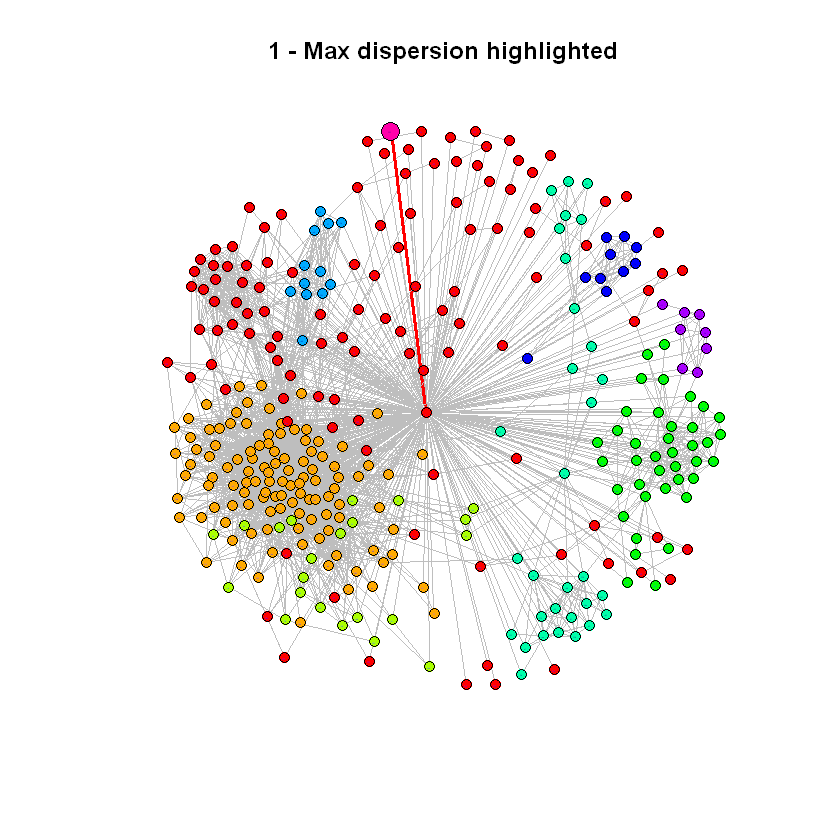

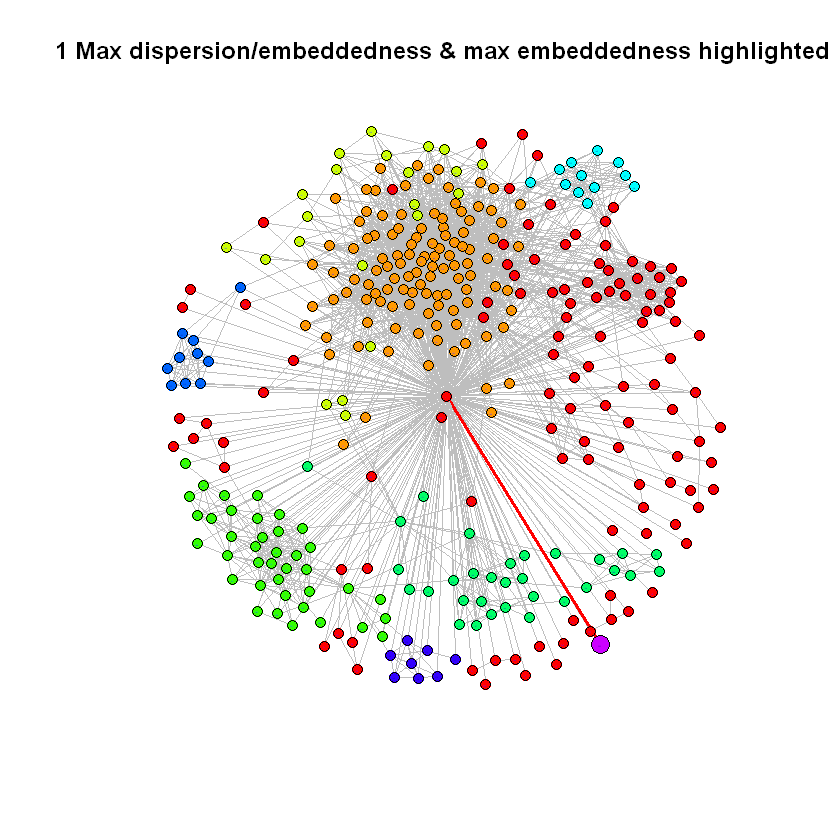

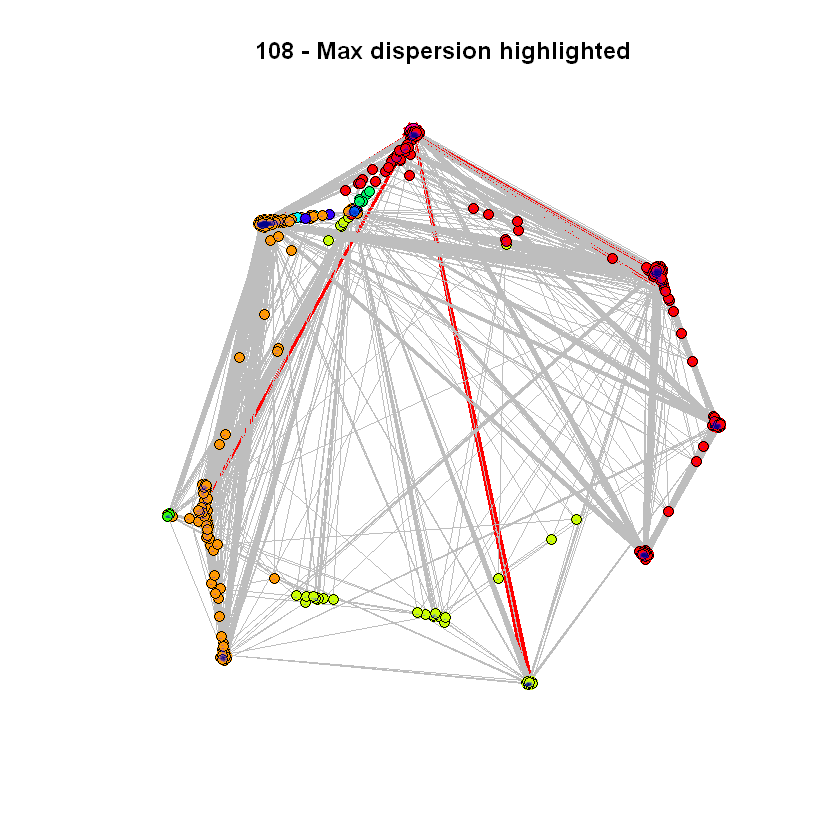

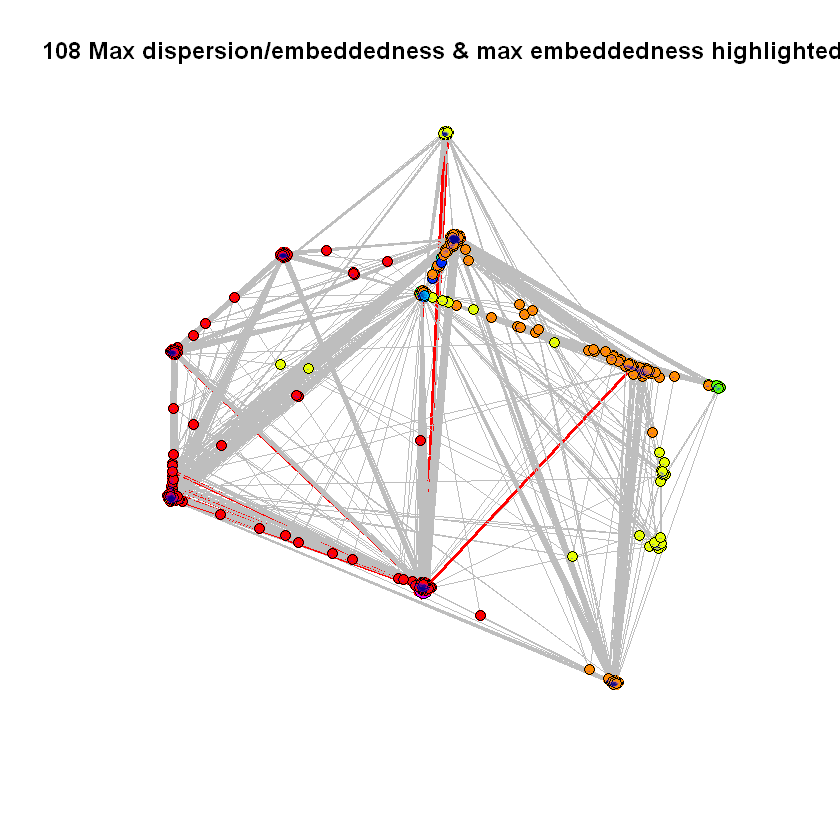

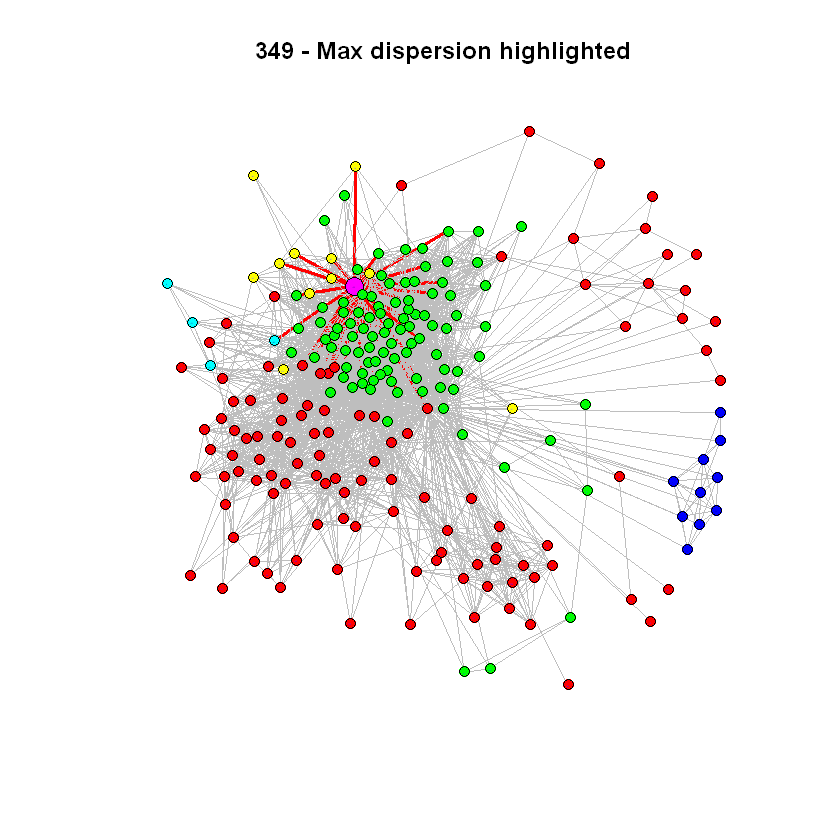

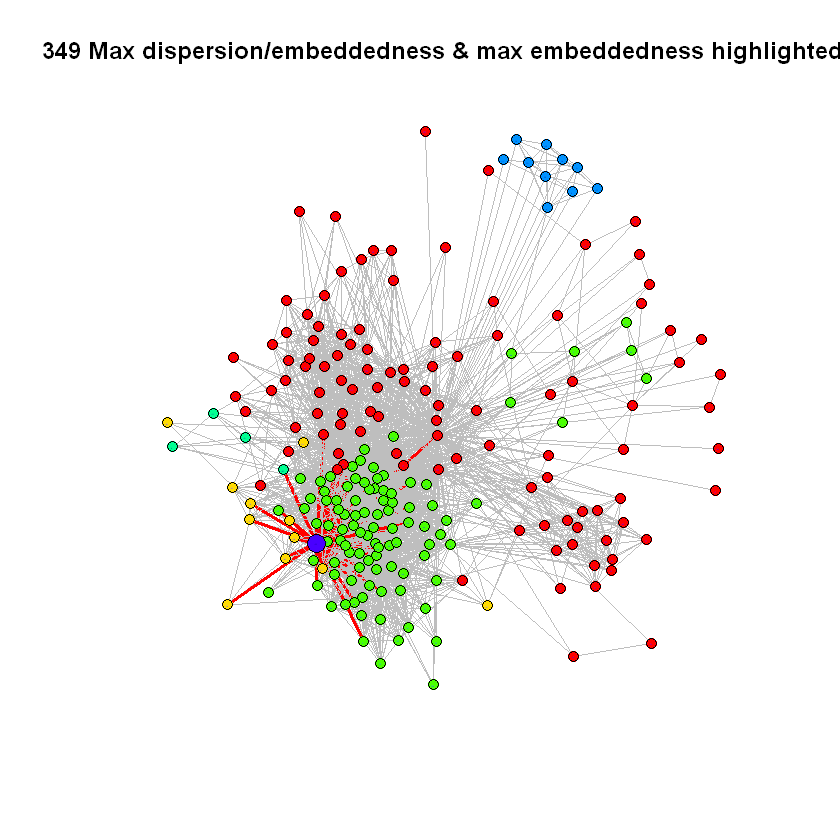

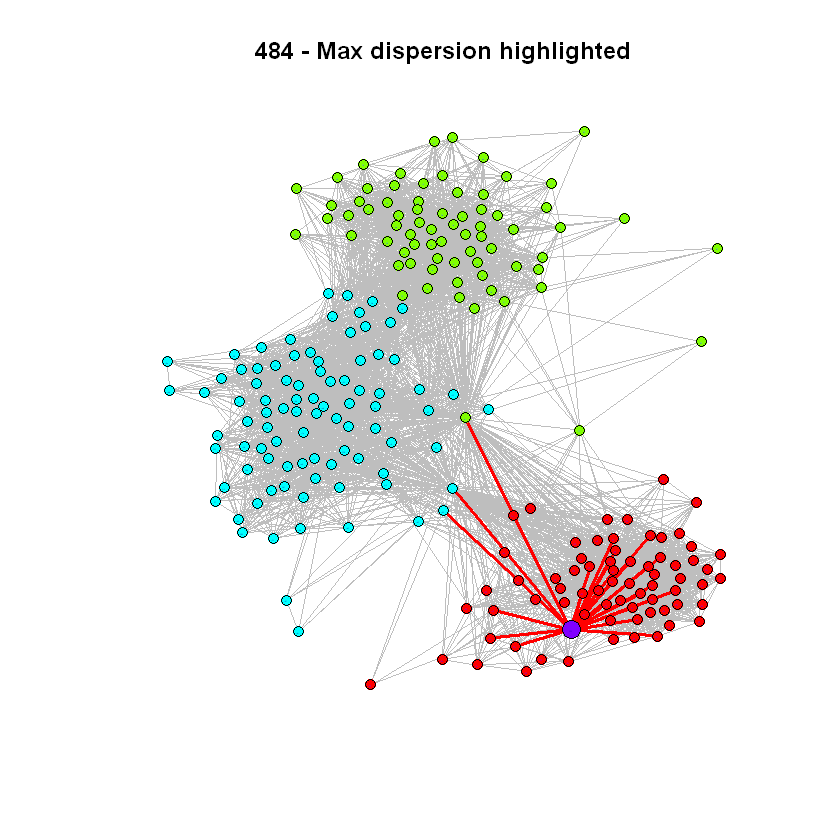

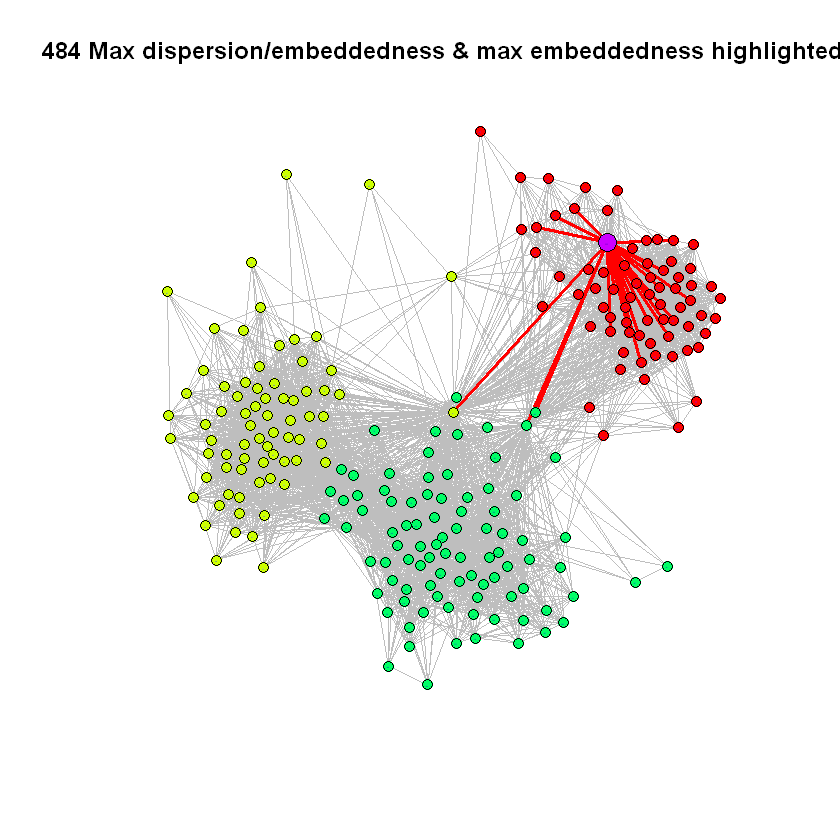

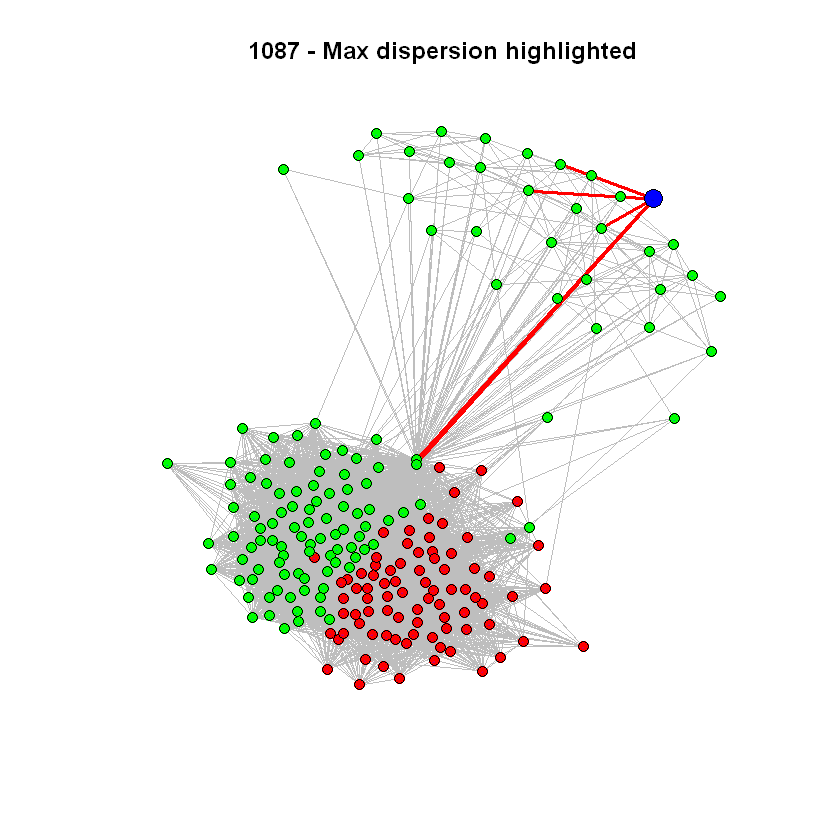

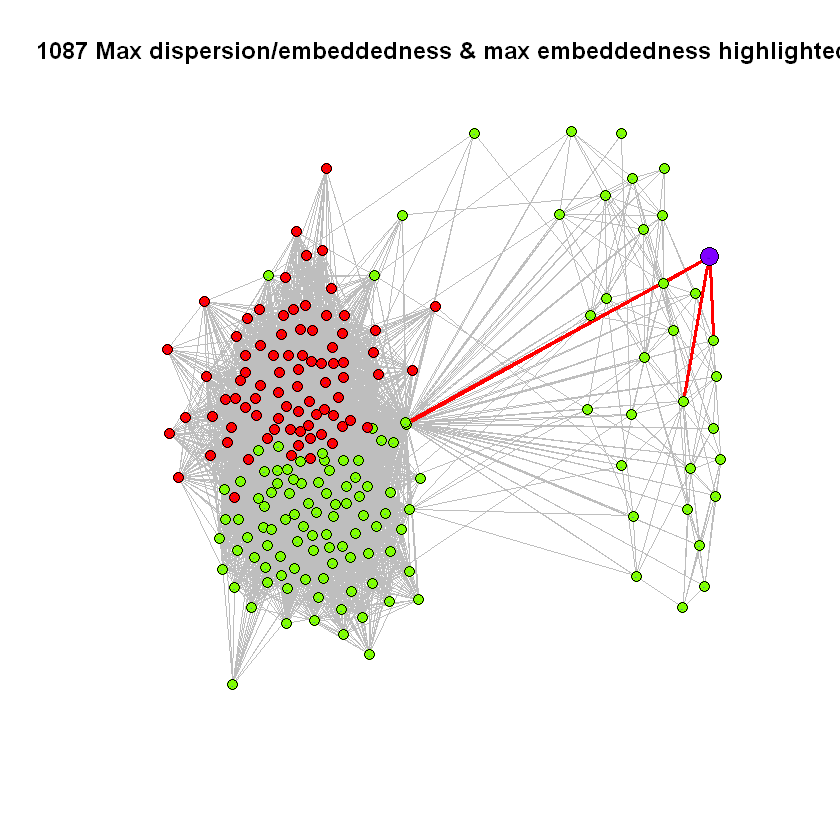

In [10]:
for(nodeid in core_nodes){
    gt = induced_subgraph(g, c(nodeid,neighbors(graph = g,v = nodeid)))
    #plot(gt,vertex.size=4,vertex.label.cex=0.2)
    coords = layout_with_fr(gt)
    gt$names = sort(which(g$names %in% c(nodeid,neighbors(graph = g,v = nodeid))))
    new_core=V(gt)[which(gt$names==nodeid)]
    fg <- cluster_fast_greedy(gt)
    
    disp_l = c()
    embed_l =c()
    
    
    person_g = induced_subgraph(g, c(neighbors(graph = g,v = nodeid)))
    for(neigh in c(1:vcount(person_g))){
        #Dispersion
        mutual_f = neighbors(person_g,neigh)
        disp_l = c(find_dispersion(person_g,neigh,mutual_f),disp_l)
        
        #embeddedness
        comm = length(mutual_f)
        embed_l = c(comm, embed_l)
        
        
    }
    maxDisNode = which(gt$names == neighbors(graph = g, v= nodeid)[which(disp_l == max(disp_l))])
    
    d_node = maxDisNode
    dispEmbed_l = disp_l / embed_l
    
    colors = rainbow(max(membership(fg))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(gt)$color = nodes_colors[membership(fg)] 
    V(gt)$size= rep(4,length(V(gt)))
    
    edge_color = rep("grey", length(E(gt)))
    edge_weight = rep(0.5, length(E(gt)))
    
    V(gt)[maxDisNode]$color = colors[length(colors)] 
    V(gt)[maxDisNode]$size = 7

    
    edge_color[which(get.edgelist(gt, name = FALSE)[,1] == d_node | 
                     get.edgelist(gt, name = FALSE)[,2] == d_node)] = "red";
    edge_weight[which(get.edgelist(gt, name = FALSE)[,1] == d_node |  
                      get.edgelist(gt, name = FALSE)[,2] == d_node)] = 3;
    
    #Plot the graph with max disp highlighted
    #cat(paste(nodeid,"- Fast greedy modularity :"),modularity(fg),"\n")
    plot(gt,edge.width = edge_weight,edge.color =  edge_color,vertex.label.cex=0.01)
    title(main = paste(nodeid,"- Max dispersion highlighted"))
    
    
    #plot the graph with max disp/embed and max embed highlighted
    maxDisEmbedNode = which(gt$names == neighbors(graph = g, v= nodeid)[which(dispEmbed_l == max(dispEmbed_l))])
    maxEmbedNode = which(gt$names == neighbors(graph = g, v= nodeid)[which(embed_l == max(embed_l))])
    
    colors = rainbow(max(membership(fg))+2)
    nodes_colors = colors[1:(length(colors)-2 )]
    V(gt)$color = nodes_colors[membership(fg)] 
    V(gt)$size= rep(4,length(V(gt)))
    
    edge_color = rep("grey", length(E(gt)))
    edge_weight = rep(0.5, length(E(gt)))
    
    V(gt)[maxEmbedNode]$color = colors[length(colors) - 1] 
    V(gt)[maxEmbedNode]$size = 7
    
    V(gt)[maxDisEmbedNode]$color = colors[length(colors)] 
    V(gt)[maxDisEmbedNode]$size = 7

    
    edge_color[which(get.edgelist(gt, name = FALSE)[,1] == maxEmbedNode | 
                     get.edgelist(gt, name = FALSE)[,2] == maxEmbedNode)] = "red";
    edge_weight[which(get.edgelist(gt, name = FALSE)[,1] == maxEmbedNode |  
                      get.edgelist(gt, name = FALSE)[,2] == maxEmbedNode)] = 3;
    
    edge_color[which(get.edgelist(gt, name = FALSE)[,1] == maxDisEmbedNode | 
                     get.edgelist(gt, name = FALSE)[,2] == maxDisEmbedNode)] = "red";
    edge_weight[which(get.edgelist(gt, name = FALSE)[,1] == maxDisEmbedNode |  
                      get.edgelist(gt, name = FALSE)[,2] == maxDisEmbedNode)] = 3;
    
    plot(gt,edge.width = edge_weight,edge.color =  edge_color,vertex.label.cex=0.01)
    title(main = paste(nodeid,"Max dispersion/embeddedness & max embeddedness highlighted"))
}


In [9]:
maxDisEmbedNode

[1] 206